## Parkinson's Disease Prediction

**Installing Necessary Libraries and importing them**

In [2]:
#NumPy for numerical operations, Pandas for data handling, and scikit-learn for machine learning tasks.
!pip install numpy
!pip install pandas
!pip install scikit-learn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

**Loading and Exploring Data**

In [3]:
# Reads the Parkinson's disease dataset from CSV file
data=pd.read_csv(r'C:\Users\Hp\.ipynb_checkpoints\Parkinsson disease.csv')

In [4]:
#Displays first few rows from dataset
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
#Displays last few rows from dataset
data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [6]:
#Displays last few rows from dataset
data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [7]:
#Displays information about the dataset
data.info

<bound method DataFrame.info of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MD

In [8]:
#shows statistical summaries
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
# Checks null value in the dataset by adding them
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
#shows statistical datatypes
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

**Correlation**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selects only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   

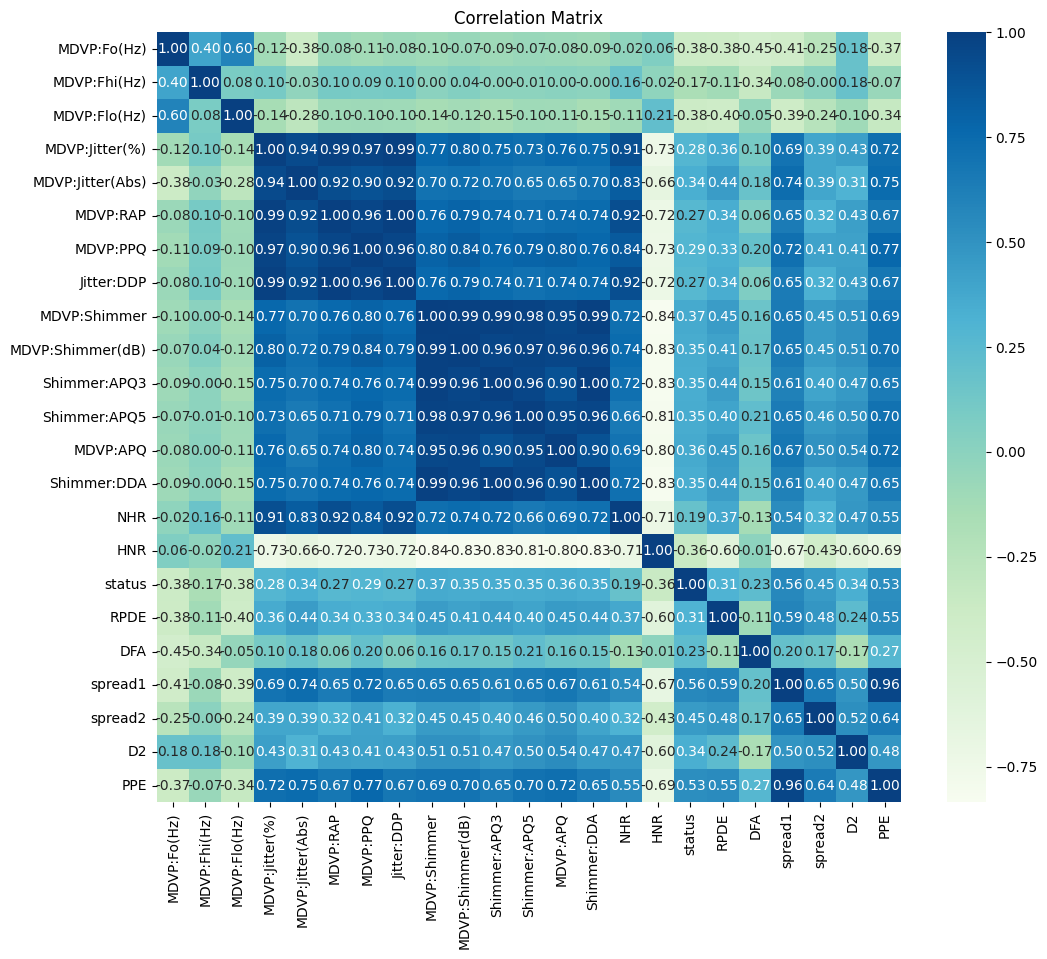

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="GnBu")
plt.title("Correlation Matrix")
plt.show()

**Analyzing the Target Variable**

In [13]:
#Counts how many instances of each class (0 or 1) are present in the 'status' column, which is the target variable indicating Parkinson's disease.
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

**Preprocessing and Grouping Data**

In [14]:
# Selects numeric columns from the data and calculates the mean values of these columns grouped by the 'status' column.
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


**Feature Selection and Splitting Data**

In [15]:
# Dropping unnecessary columns for prediction, separates features (X) and the target variable (Y)
X = data.drop(columns=['name','status'], axis=1)
Y = data['status']

In [16]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [17]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [18]:
#Splitting the data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


**Data Standardization**

In [20]:
#Standardizing the feature data to have a mean of 0 and a standard deviation of 1, for SVM.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [22]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


**Training the SVM Model**

In [23]:
#Initializing the SVM model with a linear kernel.
model = svm.SVC(kernel='linear')

In [24]:
# Training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation**

In [25]:
#Predicting outcomes with train and test data and calculating accuracy for datasets to evaluate performance.
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [26]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8846153846153846


In [51]:
#Predicting outcomes with train and test data and calculating accuracy for datasets to evaluate performance.
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [52]:
print('Accuracy score of training data : ', test_data_accuracy)

Accuracy score of training data :  0.7435897435897436


**Making Predictions with New Data**

In [27]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# Convert the input data into a Pandas DataFrame with the same feature names as X
input_data_df = pd.DataFrame([input_data], columns=X.columns)

# Standardize the data using the same scaler used for X_train
std_data = scaler.transform(input_data_df)

# Use the model to make a prediction
prediction = model.predict(std_data)
print(prediction)

# Interpret the prediction
if (prediction[0] == 0):
    print("The Person does not have Parkinson's Disease")
else:
    print("The Person has Parkinson's")

[0]
The Person does not have Parkinson's Disease


**Hyperparameter Tuning for SVM**

In [28]:
# Manual Hyperparameter Tuning
C_values = [ 0.1, 10, 100]
kernels= ['linear']
gamma_values = ['scale', 'auto', 0.1, 1, 10]

for C in C_values:
    for kernel in kernels:
        for gamma in gamma_values:
            # Creating and training the SVM model
            model = svm.SVC(C=C, kernel=kernel, gamma=gamma)
            model.fit(X_train, Y_train)

            # Make predictions
            svm_predictions = model.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(svm_predictions,Y_test)

            # Print or store the accuracy and hyperparameters
            print(f'Accuracy for C={C}, kernel={kernel}, gamma={gamma}: {accuracy}')


Accuracy for C=0.1, kernel=linear, gamma=scale: 0.8205128205128205
Accuracy for C=0.1, kernel=linear, gamma=auto: 0.8205128205128205
Accuracy for C=0.1, kernel=linear, gamma=0.1: 0.8205128205128205
Accuracy for C=0.1, kernel=linear, gamma=1: 0.8205128205128205
Accuracy for C=0.1, kernel=linear, gamma=10: 0.8205128205128205
Accuracy for C=10, kernel=linear, gamma=scale: 0.7948717948717948
Accuracy for C=10, kernel=linear, gamma=auto: 0.7948717948717948
Accuracy for C=10, kernel=linear, gamma=0.1: 0.7948717948717948
Accuracy for C=10, kernel=linear, gamma=1: 0.7948717948717948
Accuracy for C=10, kernel=linear, gamma=10: 0.7948717948717948
Accuracy for C=100, kernel=linear, gamma=scale: 0.7948717948717948
Accuracy for C=100, kernel=linear, gamma=auto: 0.7948717948717948
Accuracy for C=100, kernel=linear, gamma=0.1: 0.7948717948717948
Accuracy for C=100, kernel=linear, gamma=1: 0.7948717948717948
Accuracy for C=100, kernel=linear, gamma=10: 0.7948717948717948


In [29]:
#separates it into features (all columns except 'status') and labels (the 'status' column). 
features = data.loc[:, data.columns != 'status'].values[:, 1:]
labels = data.loc[:, 'status'].values
#Printing the count of each class in labels to check for balance.
print(labels[labels == 1].shape[0], labels[labels == 0].shape[0])


147 48


**Feature Scaling**

In [30]:
#importing minmaxscaler
from sklearn.preprocessing import MinMaxScaler

#Scales the feature values between -1 and 1, which is beneficial for model performance.
scaler = MinMaxScaler((-1, 1))
x = scaler.fit_transform(features)
y = labels

**Splitting Data into Training and Testing Sets**

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

**Installing and Training the XGBoost Model**

In [32]:
!pip install xgboost

In [33]:
from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='mlogloss')
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

**Model Evaluation and confusion matrix for detail evaluation**

In [34]:
#Makes predictions on the test data and evaluates the model's accuracy.

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100}%")

#Creates a confusion matrix to get a more detailed view of the model's performance, showing true positives, true negatives, false positives, and false negatives.

confusion_matrix_df = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Healthy', 'Predicted Parkinsons'],
    index=['True Healthy', 'True Parkinsons']
)
print(confusion_matrix_df)

Accuracy: 94.87179487179486%
                 Predicted Healthy  Predicted Parkinsons
True Healthy                     5                     2
True Parkinsons                  0                    32


In [35]:
import xgboost as xgb
# Hyperparameter values
learning_rates = [0.01, 0.1, 0.2]
max_depths = [3, 4]
n_estimators = [100, 200, 300]

# Manual Hyperparameter Tuning
for lr in learning_rates:
    for depth in max_depths:
        for n_est in n_estimators:
            model = xgb.XGBClassifier(learning_rate=lr, max_depth=depth, n_estimators=n_est, eval_metric='logloss')
            model.fit(X_train, y_train)

            # Making predictions
            predictions = model.predict(X_test)

            # Calculating accuracy
            accuracy = accuracy_score(y_test, predictions)

            # Print or store the accuracy and hyperparameters
            print(f'Accuracy for learning_rate={lr}, max_depth={depth}, n_estimators={n_est}: {accuracy}')

Accuracy for learning_rate=0.01, max_depth=3, n_estimators=100: 0.8205128205128205
Accuracy for learning_rate=0.01, max_depth=3, n_estimators=200: 0.7692307692307693
Accuracy for learning_rate=0.01, max_depth=3, n_estimators=300: 0.8205128205128205
Accuracy for learning_rate=0.01, max_depth=4, n_estimators=100: 0.8205128205128205
Accuracy for learning_rate=0.01, max_depth=4, n_estimators=200: 0.7692307692307693
Accuracy for learning_rate=0.01, max_depth=4, n_estimators=300: 0.7948717948717948
Accuracy for learning_rate=0.1, max_depth=3, n_estimators=100: 0.8205128205128205
Accuracy for learning_rate=0.1, max_depth=3, n_estimators=200: 0.8461538461538461
Accuracy for learning_rate=0.1, max_depth=3, n_estimators=300: 0.7948717948717948
Accuracy for learning_rate=0.1, max_depth=4, n_estimators=100: 0.8461538461538461
Accuracy for learning_rate=0.1, max_depth=4, n_estimators=200: 0.7948717948717948
Accuracy for learning_rate=0.1, max_depth=4, n_estimators=300: 0.7948717948717948
Accuracy f

**Parkinson's Disease Prediction using KNN and PCA**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
data=pd.read_csv(r'C:\Users\Hp\.ipynb_checkpoints\Parkinsson disease.csv')

In [37]:
#Selects only numeric columns and calculates the mean values for each class in the 'status' column.
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.groupby('status').mean()

# Separating features and labels
features = numeric_data.drop('status', axis=1)
labels = numeric_data['status']


# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Applying PCA for Dimensionality Reduction**

In [46]:
#Reduces the dimensionality of the data to 2 components using PCA, which helps in visualizing data and can improve model performance.
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
variance = pca.explained_variance_ratio_
print("Variance explained by each PCA component:", variance)

Variance explained by each PCA component: [0.61091639 0.11646298]


**Training the KNN Model**

In [47]:
#Initializes and trains the KNN model with specified parameters. The Minkowski metric with p=2 is equivalent to the standard Euclidean distance.
classifi = KNeighborsClassifier(n_neighbors=8, p=2, metric='minkowski')
classifi.fit(x_train_pca, y_train)

KNeighborsClassifier(n_neighbors=8)

**Making Predictions and Evaluating the Model****

In [48]:
#The model predicts outcomes for the test set. The accuracy of the model is computed and displayed.
y_pred = classifi.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")

Accuracy of KNN model: 84.62%


**Confusion Matrix for Detailed Performance Analysis**

In [49]:
confusion_matrix_df = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Healthy', 'Predicted Parkinsons'],
    index=['True Healthy', 'True Parkinsons']
)
print("Confusion Matrix:")
print(confusion_matrix_df)

Confusion Matrix:
                 Predicted Healthy  Predicted Parkinsons
True Healthy                     4                     3
True Parkinsons                  3                    29


**Hyperparameter Tuning for KNN**

In [50]:
# Define a range of hyperparameters for tuning
neighbors = [3, 5, 7, 9, 11, 13, 15]
metrics = ['euclidean', 'manhattan', 'minkowski']

best_accuracy = 0
best_params = {'n_neighbors': 0, 'metric': ''}

for metric in metrics:
    for n in neighbors:
        classifi = KNeighborsClassifier(n_neighbors=n, metric=metric)
        classifi.fit(x_train_pca, y_train)
        y_pred = classifi.predict(x_test_pca)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for n_neighbors={n}, metric={metric}: {accuracy * 100:.2f}%")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n
            best_params['metric'] = metric

print("Best Parameters:", best_params)

Accuracy for n_neighbors=3, metric=euclidean: 87.18%
Accuracy for n_neighbors=5, metric=euclidean: 87.18%
Accuracy for n_neighbors=7, metric=euclidean: 82.05%
Accuracy for n_neighbors=9, metric=euclidean: 84.62%
Accuracy for n_neighbors=11, metric=euclidean: 87.18%
Accuracy for n_neighbors=13, metric=euclidean: 87.18%
Accuracy for n_neighbors=15, metric=euclidean: 89.74%
Accuracy for n_neighbors=3, metric=manhattan: 87.18%
Accuracy for n_neighbors=5, metric=manhattan: 89.74%
Accuracy for n_neighbors=7, metric=manhattan: 84.62%
Accuracy for n_neighbors=9, metric=manhattan: 87.18%
Accuracy for n_neighbors=11, metric=manhattan: 84.62%
Accuracy for n_neighbors=13, metric=manhattan: 87.18%
Accuracy for n_neighbors=15, metric=manhattan: 87.18%
Accuracy for n_neighbors=3, metric=minkowski: 87.18%
Accuracy for n_neighbors=5, metric=minkowski: 87.18%
Accuracy for n_neighbors=7, metric=minkowski: 82.05%
Accuracy for n_neighbors=9, metric=minkowski: 84.62%
Accuracy for n_neighbors=11, metric=mink